# Red Black Marble

## Question: 
There are 4 red and 4 black marbles in a bag. Draw one at time. If you have drawn more black than red, winnings are the number of black marbles in excess of red. Otherwise, you get nothing. Quit at any time. What is your optimal strategy?

## Intuition:
- Firstly you can quit any time, this guarantees at least 0 winning, no loss can occur. If you find at any point you lose money (e.g. 3 red, 1 black in hand), just keep going until finish drawing all 8 balls from the bag.

- Then, think about the strategy. Is it optimal to quit at following points, you draw:
    - R, R, 
    - R, R, B, 
    - R, R, B, B,
    - ...
    
- You don't want to quit in case 1 and 2 to realize the loss. In case 3, stop with winning 0 v.s. keep going with chances of winning something, you choose the latter one.
    - The option to quit at any time is in our favor ; )
    
<!--- --->

- If you are lucky to draw a Black at 1st time, you seems not satisified to stop and take just 1 dollar. You try to make a 2nd draw. Possibilities can be either you draw a Black(p=3/7) at 2nd time, then win 2 dollar,or you draw a Red(p=4/7), win 0.The expection on 2nd move 3/7 \* 2 + 4/7 * 0 is less then 1.Is it a good time to stop? 

<!--- No. Even when you draw 1 Black and 1 Red after 2nd move, the immediate payoff is 0. However, chances of winning leads to a positive expected payoff.So we need to modify the payoff of 0 above.
    - From this, we figured out that the strategy given one status S(num of red, num of black) is not solely depends on its $$ Payoff_{immediate} = max(\#black - \#red, 0)$$ The decision can be made after comparing it to $$ Payoff_{expected} = p_{red} * payoff(\#red+1, \#black) + p_{black} * payoff(\#red, \#black+1) $$ We take the max of the two. --->

- The **Dynamic Programming** question can be solved by backward induction.The state space looks like a binomal tree. The state, stategy and payoff at each node of this binomial tree can be computed. The logic is the same for many questions of this kind.

## Draw a binomial tree

In [3]:
import matplotlib.pyplot as plt

In [19]:
from IPython.display import Image
Image(url= "https://github.com/dlu-umich/Quant-Lab/blob/master/half_tree.png?raw=true")

## Coding - recursion
    
    

In [7]:
def payoff(r, b):
    if r == 0:
        return 0

    if b == 0:
        return r  

    stop = max(r-b, 0)
    go = r/(r+b) * payoff(r-1, b) + b/(r+b) * payoff(r, b-1) ## backward recursion    
    return max(stop, go)

print(payoff(0,0))
print(payoff(1,3))
print(payoff(4,4))

0
0.25
0.9999999999999999


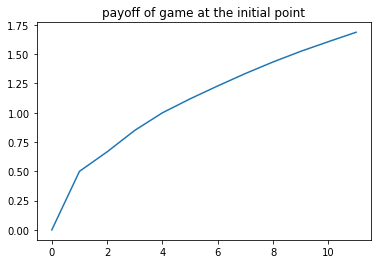

In [8]:
n = 12 ## try n = 20 ?
x = range(n)
res = [payoff(i,i) for i in range(n)]
plt.plot(x,res)
plt.title("payoff of game at the initial point")
plt.show()
# payoff of game at the initial point

In [9]:
import timeit

for i in range(n):
    start = timeit.default_timer()
    res = payoff(i,i)
    stop = timeit.default_timer()
    print('Time: ', stop - start) 
    
# observe that running time grows exponentially fast with n

Time:  2.318837353501653e-06
Time:  1.0202884355407272e-05
Time:  1.6231861474511533e-05
Time:  4.4057909716531396e-05
Time:  0.00015397080027250985
Time:  0.00047165151770223624
Time:  0.0019237074684649712
Time:  0.007091468394478755
Time:  0.016908961981734055
Time:  0.050692567152370346
Time:  0.2014174588974485
Time:  0.6451585226779974


#### Complexity analysis:
For a bag with n red marbles and n black marbles, how long will the recursion take? 
- For original state S(n,n), it will need two function calls of S(n-1,n) and S(n,n-1)
- Each node will need 2 function calls. Notice, even though the binomial tree is recombined, the function call is not.So going one layer deeper doubles the computing time. We have n + n balls, so the tree is n depth symmetrically on both sides. It is $O(2^{2n})$ complexity.

## Coding - tree:
By making use of recombining tree and already computed nodes, we can turn it into $O(n^2)$ complexity - simply counting the edges.

In [26]:
class Node:
    def __init__(self, red, black, dp):
        self.r = red
        self.b = black
        self.dp = dp
        
        '''pointer to the next node - up/down'''
        self.next_up = dp.node(self.r-1, self.b) if self.r > 0 else None
        self.next_down = dp.node(self.r, self.b-1) if self.b > 0 else None
        next_up_winning = self.next_up.winning() if self.next_up else 0
        next_down_winning = self.next_down.winning() if self.next_down else 0
        
        '''backward induction'''
        self.stop = max(self.r - self.b, 0)
        self.go = self.r/(self.r + self.b) * next_up_winning \
                + self.b/(self.r + self.b) * next_down_winning if self.r + self.b > 0 else 0
        
    def winning(self):
        return max(self.stop, self.go)
    
    def query(self):
        print('stop' if self.stop > self.go else 'go')
    
class Game:
    def __init__(self):
        self.node_dict = {}
    
    def node(self, red, black):
        key = (red, black)
        if key not in self.node_dict:
            self.node_dict[key] = Node(red, black, self)
        return self.node_dict[key]

In [29]:
dp = Game()
x = dp.node(4,4).winning()
print(x)
strategy = dp.node(1,3).query()

0.9999999999999999
go


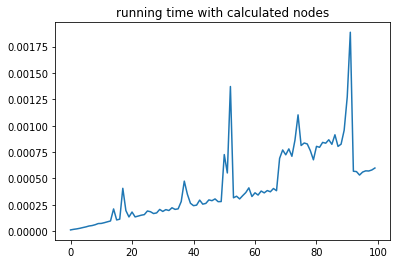

In [22]:
## performance test
dp = Game()
res = []
time = []
for n in range(100):
    start = timeit.default_timer()
    res.append(dp.node(n,n).winning())
    stop = timeit.default_timer()
    time.append(stop - start)
plt.plot(time)
plt.title("running time with calculated nodes")
plt.show()

## Similar questions:

### Dice game 1:
You can roll a dice up to 3 times. After each roll, you can either keep the number facing up or forgo the number and keep rolling. At the end of the 3rd roll, you will have to take the number facing up.What is the expected payoff of the game if you follow optimal strategy?

### Dice game 2:
Now you can roll a dice for as many times as you want unless a 6 shows up. After each roll, if 1 appears, you win \$1.If 2 appears, you win \$2. ... If 5 appears, you win \$5. However, if 6 shows up, you must give up all the winnings and the game ends. How much are you willing to pay for playing this game. (assuming you are risk neutral)

### Dice game 3:
You keep rolling a dice until the sum of two consecutive steps can be divided by 6. How many steps will it expect to take?